In [1]:
import numpy as np
from collections import deque
from invenv import InvEnv
from creaternddemand import *
from q_agent import Agent
import torch
import random
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def dqn(env, n_episodes= 1000, max_t = 10000, eps_start=1.0, eps_end = 0.01,
       eps_decay=0.995):
    """Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training epsiodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon 
        eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
        
    """
    scores = [] # list containing score from each episode
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state,eps)
            if (action % 2) == 1:
                action = action + 1 # only taking even action reducing action space 11
            next_state,reward,done = env.step(action)
            agent.step(state,action,reward,next_state,done)
            ## above step decides whether we will train(learn) the network
            ## actor (local_qnetwork) or we will fill the replay buffer
            ## if len replay buffer is equal to the batch size then we will
            ## train the network or otherwise we will add experience tuple in our 
            ## replay buffer.
            state = next_state
            score += reward
            if done:
                if (i_episode % 100) == 0:
                    print('episode'+str(i_episode)+':', score)
                scores.append(score)
                break
        eps = max(eps*eps_decay,eps_end)## decrease the epsilon
    return scores

env=InvEnv(genRndDemand52wk())
# Action size is 11
agent = Agent(state_size=env.observation_space_dimension(), action_size=int(env.action_space_dimension()/2)+1,seed=0)
scores= dqn(env)


episode100: 6965.0
episode200: 14341.0
episode300: 16709.0
episode400: 18404.0
episode500: 18334.0
episode600: 17783.0
episode700: 18602.0
episode800: 17763.0
episode900: 18026.0
episode1000: 17517.0


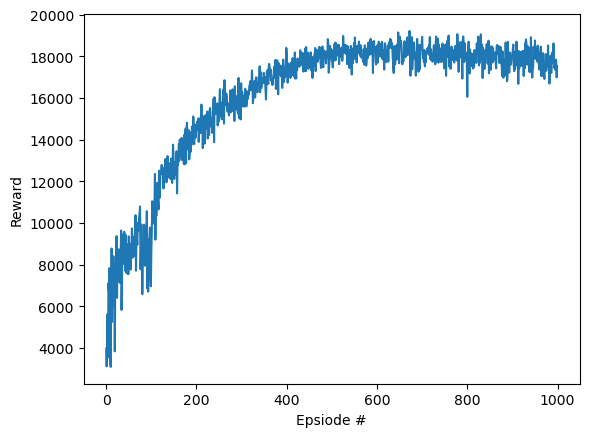

In [4]:
plt.plot(np.arange(len(scores)),scores)
plt.ylabel('Reward')
plt.xlabel('Epsiode #')
plt.show()